In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow 
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:

train_images.shape

(60000, 28, 28)

In [33]:

len(train_labels)

60000

In [34]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [35]:
test_images.shape

(10000, 28, 28)

In [36]:
len(test_labels)

10000

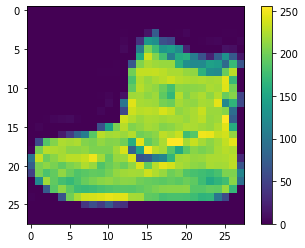

In [37]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5035 - acc: 0.8234
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3762 - acc: 0.8642
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3355 - acc: 0.8783
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3172 - acc: 0.8838
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2981 - acc: 0.8898
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2819 - acc: 0.8958
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2705 - acc: 0.8979
Epoch 8/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.2588 - acc: 0.9033
Epoch 9/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2490 - acc: 0.9072
Epoch 10/10
60000/60000 [==============================] - 

In [42]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3451 - acc: 0.8807

Test accuracy: 0.8807


In [43]:
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
predictions = model.predict(test_images)

In [45]:
predictions[0]

array([1.1997829e-06, 2.2850018e-06, 4.5749698e-07, 4.4047010e-09,
       6.3143375e-07, 1.0042561e-03, 1.8361440e-07, 1.0939011e-01,
       2.9839325e-06, 8.8959783e-01], dtype=float32)

In [46]:
np.argmax(predictions[0])


9

In [47]:
test_labels[0]

9

In [48]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [49]:

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [50]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1485625e-03 2.0269049e-12 9.9676055e-01 1.2560243e-10 1.9568298e-03
  2.4344380e-13 1.3408900e-04 4.2595076e-19 1.0555589e-09 1.0478112e-18]]


In [51]:
np.argmax(predictions_single[0])


2

In [0]:
model.save('FashionMNIST.h5')